In [32]:
# magic! (don't worry about this)
%load_ext autoreload
%autoreload 2
#%matplotlib inline

In [33]:
# let us import some useful things
from lib import *
from classifiers import *
from numpy import mean
#from graphs import *
from sklearn import tree
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


Sally sends you a picture of a dress that she has just found. Excited, you text back "Did you buy it?" and she asks you to guess whether she bought the dress or not. You know Sally very well, What is your thought process on whether Sally bought the dress or not? 

Draw up this process.

Lets run an example through this: 

## What is a tree? 

How to make a tree (hand-wavy algorithm):
    1. Find the best feature to divide on (this is the hard part)
    2. Divide on x_p and assign training samples to each leaf. 
    3. If the leaf is "pure" stop. Otherwise iterate over


### How to choose this x_p

#### What type of variables we have
    1. Continuous 
    2. Ordinary
    3. Nominal
    




### Entropy
$S = - \sum_i \log(p_i) p_i$

Maximized at $p_i = \frac{1}{n_c}$

/Users/armin/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/armin/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


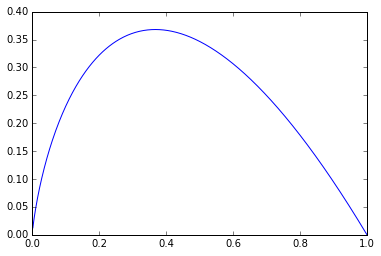

In [34]:
p = np.linspace(0,1,500)
y = - np.log(p)*p
plt.plot(p,y)
plt.show()

### Gini index

![:(](https://nicfoley.files.wordpress.com/2013/07/genie.jpg)

$I = \sum_i p_i (1-p_i)$

This is maximized at $p_i = \frac{1}{n_c}$ where $n_c$ is the number of classes  

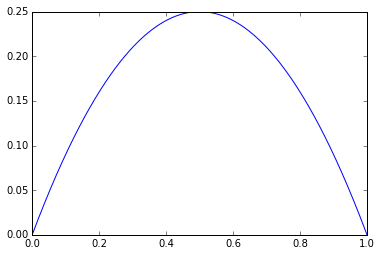

In [35]:
p = np.linspace(0,1,500)
y = (1-p)*p
plt.plot(p,y)
plt.show()

The cost after splitting is the weighted cost of each node. 

The idea for choosing the branch to split on is to split on the attribute witht he biggest improvment in purity. This is a greedy way to build the tree (Why? Can we construct an example where this greedy method doesn't work?)


Let's go back to how to deal with different types of variables. 

For continous variables, and ordinal variables: we choose a particular position (any ideas how to do this for continuous variables?) For nominal variables, we have n! combinations to choose from :( (this could be prohibitively large but there are tricks to deal with it)

After the tree is constructed, it will need to be pruned to prevent overfitting. 

Why trees: 
    1. They are easy to understand (interpretable)
    2. They have ways of dealing with missing data 
    3. They are fairly good at classifying (but it can get better)
    4. Cost of prediction is low (this is not very important for us)
    5. Can do variable selection to some extent 
    6. Natural to use for all kinds of features 

In [36]:
# load the data same as before
microarray_file_name = '../data/leukemia_ALL_AML_matrix.txt'
labels_file_name = '../data/leukemia_ALL_AML_labels.txt'
data_store = DataSet(microarray_file_name, labels_file_name)

In [37]:
# This train function is *almost* the same as the train method that 
# your knn classifier. The difference is that this is a function that
# takes as one of the parameters the decision tree, so it will be called
# like: train(decision_tree, train_samples)
def train(decision_tree, train_samples):
    feature_array = [sample.get_gene_profile() for sample in train_samples]
    labels = [sample.get_label() for sample in train_samples]
    decision_tree.fit(feature_array, labels)

def classify(decision_tree, test_samples):
    labelled_samples = []
    feature_array = [sample.get_gene_profile() for sample in test_samples]
    results = decision_tree.predict(feature_array)
    labelled_samples = [(test_samples[i], results[i]) for i in range(len(test_samples))]
    return labelled_samples


In [71]:
# Here, you can set criterion = "entropy" or "gini", which will determine
# what equation the decision tree will use to measure the quality of a split
#
# You can set max_features=None, "sqrt", or "log2", which will determine how many
# features the decision tree will use. Setting it to None will use all the features,
# sqrt will use sqrt(number of features) and log2 will use log2(number of features)
#
# Play around! What settings are best? Do they change for the different data sets?
decision_tree = tree.DecisionTreeClassifier(criterion="entropy", max_features=None)
train(decision_tree, data_store.get_train_set())

classified_samples = classify(decision_tree, data_store.get_test_set())
# let's evaluate how well the classifier worked
evaluate_results(classified_samples)
#compare this final answer with your neighbor. did you get the same answer? 

Accuracy: 96.00%


In [ ]:
#plot_errors(classified_samples)

In [269]:
def bootstrap(data):
    N = len(data)
    sample = np.random.choice(N, N)
    return [data[i] for i in sample]

def bagTrain(ntrees):
    myTrees = []
    for i in range(ntrees):
        decision_tree = tree.DecisionTreeClassifier(criterion="entropy", max_features=None)
        train(decision_tree, bootstrap(data_store.get_train_set()))
        myTrees.append(decision_tree)
    return myTrees

def bagClassify(myTrees, test_samples):
    classification = []
    for sample in test_samples:
#         print sample.get_gene_profile()
        judgment = []
        for tree in myTrees:
            judgment.append(classify(tree, [sample]))
        judgment = [item[0][1] for item in judgment]
        classification.append([sample, mean(judgment) > 0.5])
    return classification
    


In [287]:
myTrees = bagTrain(1)
classes = bagClassify(myTrees, data_store.get_test_set())
evaluate_results(classes)

Accuracy: 92.00%


Run the regular tree and the bagged tree multiple times. What do you notice? 